In [397]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_validate, ShuffleSplit,train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
%matplotlib inline

In [256]:
df_train = pd.read_csv('data/kc_house_data.csv')
df_test = pd.read_csv('data/kc_house_data.csv')
df = pd.read_csv('data/kc_house_data.csv')

In [281]:
#with open('data/column_names.md') as f:
    #text = f.read()
#print(text)

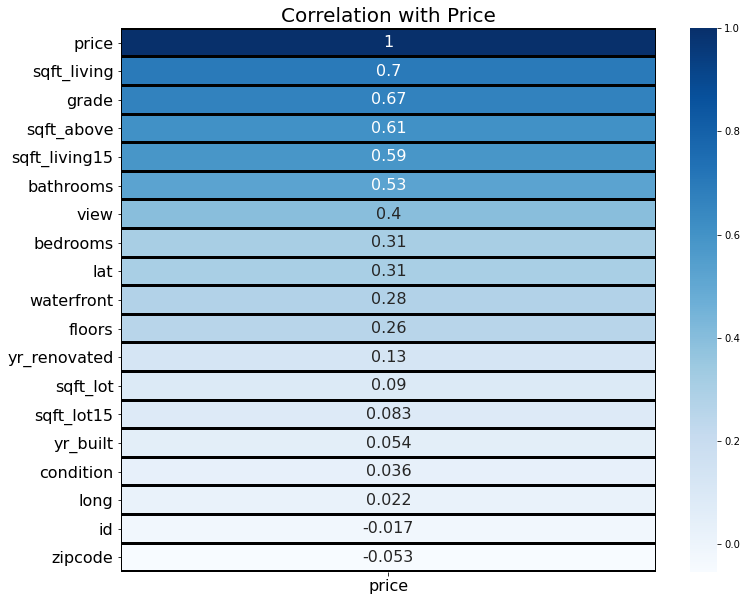

In [145]:
X_train = df_train.drop(['price','date','sqft_basement'],axis=1)
Y_train = np.array(df_train['price'])
corr = df_train.corr()
x=corr[['price']]

fig , ax = plt.subplots(figsize=(12,10))

X_test = df_test.drop('price',axis=1)
Y_test = df_test['price']
sns.heatmap(x.sort_values(by=['price'],ascending=0),
                          annot=True,
                          cmap='Blues',
                          annot_kws={'fontsize':16},
                          linewidth=2,
                          linecolor='black')
ax.set_title('Correlation with Price',size=20)
ax.tick_params(labelsize=16)
                          


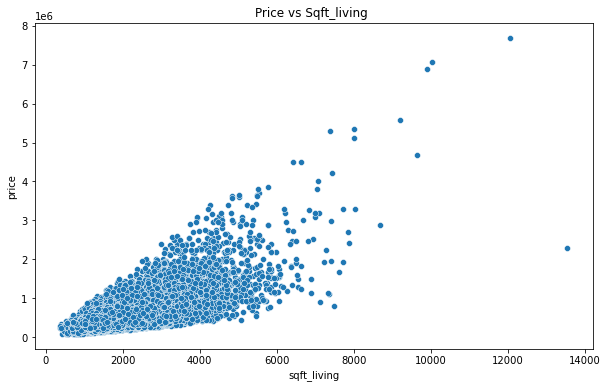

In [127]:
fig , (ax) = plt.subplots(figsize=(10,6))
ax.set_title('Price vs Sqft_living ')
sns.scatterplot(x=X_train['sqft_living'],y=Y_train);

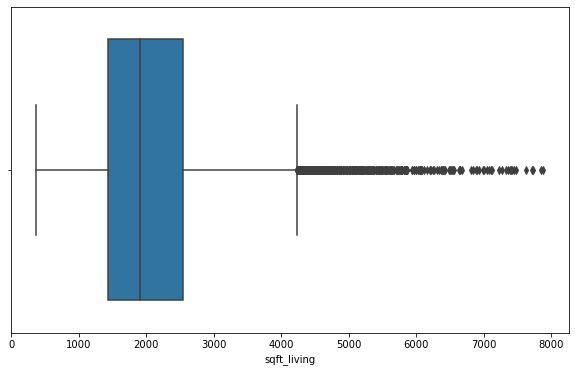

In [290]:
fig, ax = plt.subplots(figsize=(10,6))

#sns.boxplot(x=df_train['sqft_living'])

sns.boxplot(x=df_out['sqft_living'])
df_drop = df.drop(df.loc[df['sqft_living']>8000].index)
df_price = df_drop['price']

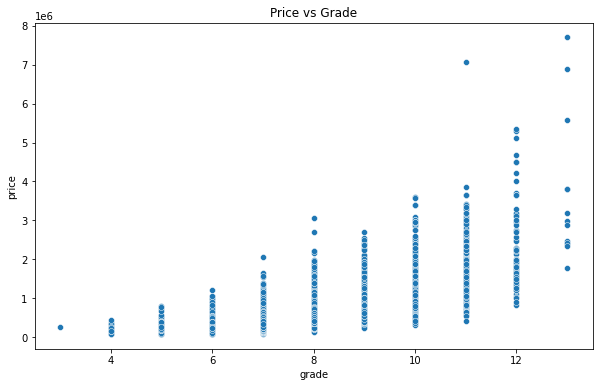

In [131]:
fig , (ax) = plt.subplots(figsize=(10,6))
ax.set_title('Price vs Grade')

sns.scatterplot(x=X_train['grade'],y=Y_train);

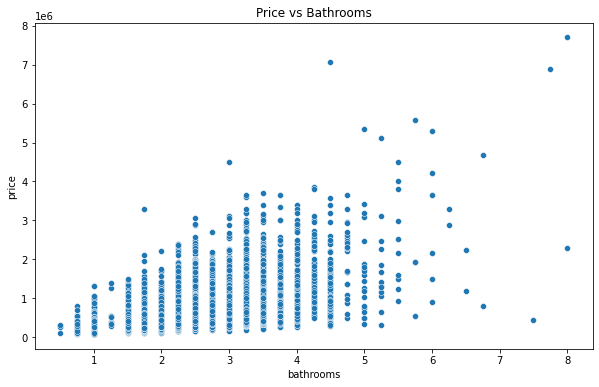

In [135]:
fig , (ax) = plt.subplots(figsize=(10,6))
ax.set_title('Price vs Bathrooms')

sns.scatterplot(x=X_train['bathrooms'],y=Y_train);

In [162]:
X_train.shape,Y_train.reshape(21597,1)
reshape = Y_train.reshape(1,-1)
reshapex = np.array(X_train).reshape(1,-1)
reshapex.shape,reshape.shape
reshapex

array([[ 7.12930052e+09,  3.00000000e+00,  1.00000000e+00, ...,
        -1.22299000e+02,  1.02000000e+03,  1.35700000e+03]])

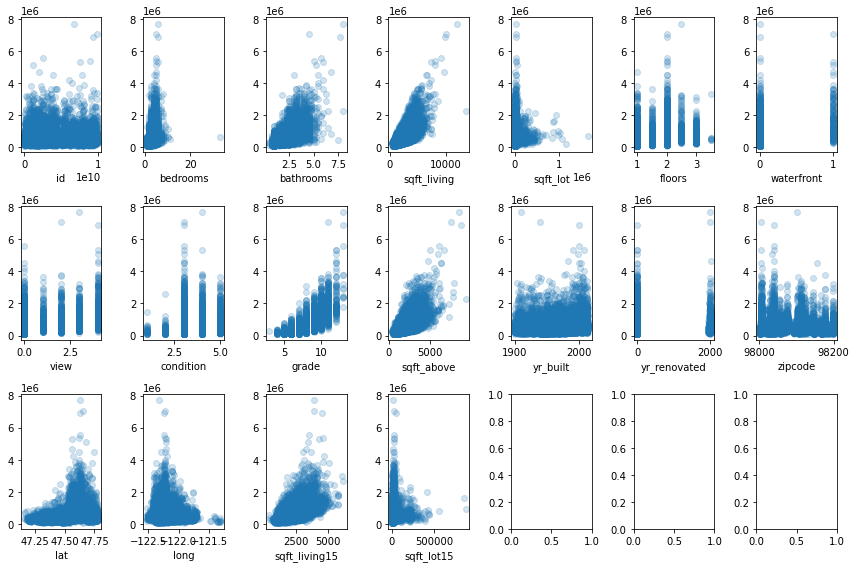

In [306]:
scatter = X_train

fig , axes = plt.subplots(nrows=3,ncols=7,figsize=(12,8))
fig.set_tight_layout(True)

for index,col in enumerate(scatter.columns):
    ax = axes[index//7][index%7]
    ax.scatter(scatter[col],Y_train,alpha=.2)
    ax.set_xlabel(col)



In [371]:
#sns.lmplot(data=df_out, x='sqft_living', y='price');
#df_out.loc[df_out['price'] > 1000000].head(50)

In [199]:
baseline_model = LinearRegression()
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(estimator=baseline_model,
                                X=x,
                                y=y,
                                return_train_score=True,
                                cv=splitter)
print('Train score:', baseline_scores['train_score'].mean())
print('Test score:', baseline_scores['test_score'].mean())

Train score: 0.48774659364870426
Test score: 0.5024006604207555


In [304]:

formula = 'price ~ sqft_living'
model = ols(formula, data=df)
model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        13:52:54   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [372]:
formula2 = 'price ~ sqft_living + grade + waterfront'
model = ols(formula2, data=df_train,)
model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     8700.
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        15:25:44   Log-Likelihood:            -2.6558e+05
No. Observations:               19221   AIC:                         5.312e+05
Df Residuals:                   19217   BIC:                         5.312e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.876e+05   1.37e+04    -42.936      0.000   -6.14e+05   -5.61e+05
sqft_living   180.4716      2.945     61.287      0.000     174.700     186.243
grade         9.75e+04   2304.784     42.301      0.000     9.3e+04    1.02e+05
waterfront   8.578e+05   2.03e+04     42.333      0.000    8.18e+05    8.98e+05
==============================================================================
Omnibus:                    14084.230   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           799379.849
Skew:                           2.967   Prob(JB):                         0.00
Kurtosis:                      34.031   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
reg= LinearRegression()

x = np.array(df_train['sqft_living']).reshape(-1,1)
y = np.array(df_train['price']).reshape(-1,1)
result = reg.fit(x,y)
result.coef_,result.intercept_



(array([[280.86301436]]), array([-43988.89219423]))

In [354]:
X = sm.add_constant(x)

model2 = sm.OLS(y,X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:45:47   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
x1           280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [230]:

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

base = LinearRegression()

x1 = np.array(df_train['waterfront']).reshape(-1,1)
x2 = np.array(df_train['grade']).reshape(-1,1)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=x,
    y=y,
    return_train_score=True,
    cv=splitter
)
baseline_scores

{'fit_time': array([0.00099206, 0.00049591, 0.00049591]),
 'score_time': array([0.        , 0.00049567, 0.00049591]),
 'test_score': array([0.48322208, 0.50717038, 0.51680952]),
 'train_score': array([0.4951006 , 0.48588579, 0.48225339])}

In [308]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

base = LinearRegression()

x1 = np.array(df_train['waterfront']).reshape(-1,1)
x2 = np.array(df_train['grade']).reshape(-1,1)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=x2,
    y=y,
    return_train_score=True,
    cv=splitter
)
baseline_scores

{'fit_time': array([0.00099111, 0.00049591, 0.00049543]),
 'score_time': array([0.        , 0.00049639, 0.00049639]),
 'test_score': array([0.46350571, 0.46247314, 0.4469086 ]),
 'train_score': array([0.44101434, 0.43831651, 0.44525222])}

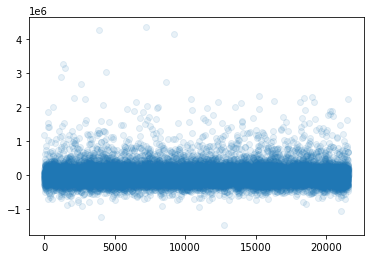

In [367]:
ss = StandardScaler()
ss.fit(x)

transform = ss.transform(x)
transform

lr = LinearRegression()
lr.fit(x,y)

y_hat = lr.predict(x)

resid = (y - y_hat)

plt.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1)

In [381]:

metrics.r2_score(y, lr.predict(x))

0.49268789904035093

In [390]:
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [391]:
lr.fit(X,y)

LinearRegression()

In [408]:
y_train_hat = lr.predict(X_train)
mse = mean_squared_error(Y_train,y_train_hat)
rmse = mean_squared_error(Y_train, y_train_hat, squared=False)
score = lr.score(X_train,Y_train)
score

print(f'Evaluate Model Prediction with Training Dataset:')
print('------------------------------------------------')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2: {score}')

Evaluate Model Prediction with Training Dataset:
------------------------------------------------
Mean Squared Error: 69086961740.93782
Root Mean Squared Error: 262843.98745441716
R^2: 0.49249290659878187


In [412]:
y_test_hat = lr.predict(X_test)
mse_test = mean_squared_error(Y_test,y_test_hat)
rmse_test = mean_squared_error(Y_test,y_test_hat,squared=False)
r2_test = lr.score(X_test,Y_test)

print(f'Evaluate Model Prediction with Testing Dataset:')
print('------------------------------------------------')
print(f'Testing Mean Squared Error: {mse_test}')
print(f'Testing Root Mean Squared Error: {rmse_test}')
print(f'Testing R^2: {r2_test}')

Evaluate Model Prediction with Testing Dataset:
------------------------------------------------
Testing Mean Squared Error: 65977373783.61759
Testing Root Mean Squared Error: 256860.61158460553
Testing R^2: 0.49332469237979504
